# Packages

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import xesmf as xe
import numpy as np
import geopandas as gpd
import shapely.geometry as geom

# Initialising data

In [3]:
datapath = f'/g/data/ng72/as9583/cylc-run/u-dr216/netcdf'
variable = 'air_temperature_1p5m'
experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['air_temperature']

# allvar['time'] = allvar['time'] + pd.Timedelta(hours=10)

In [4]:
experiment2 = 'control_d0198_RAL3P2_' #experiment name
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['air_temperature']

In [7]:
variable2 = 'surface_altitude'
sa1 = xr.open_dataset(f'{datapath}/{variable2}/{experiment1}{variable2}.nc')[variable2].isel(time=0)

#clip to just land 
variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)

In [6]:
# fires = gpd.read_file("/g/data/ng72/as9583/total_fires.gpkg")
fires = gpd.read_file('/g/data/ng72/as9583/merged_fires.gpkg')

# Plots

In [ ]:
diff_total = allvar_total - control_total


fig, ax = plt.subplots(figsize=(12, 8))
diff_total.plot(
    ax=ax,
    cmap='RdBu',
    center=0,
    levels=[-400, -300, -200, -100, -50, -10, -5, 0, 5, 10, 50, 100, 200, 300, 400],
    extend='both',
    cbar_kwargs={'label': 'Cumulative rainfall difference (mm)'}
)

contours2 = sa1.plot.contour(ax=ax, levels=[0], colors='black', linewidths=2, add_colorbar=False)

gpd.GeoSeries(merged_fires.boundary).plot(
    ax=ax, edgecolor="black", linewidth=0.5
)

plt.title("All variables - Control (full period)")
plt.xlabel("Longitude (°E)", fontsize=12)
plt.ylabel("Latitude (°N)", fontsize=12)
plt.show()


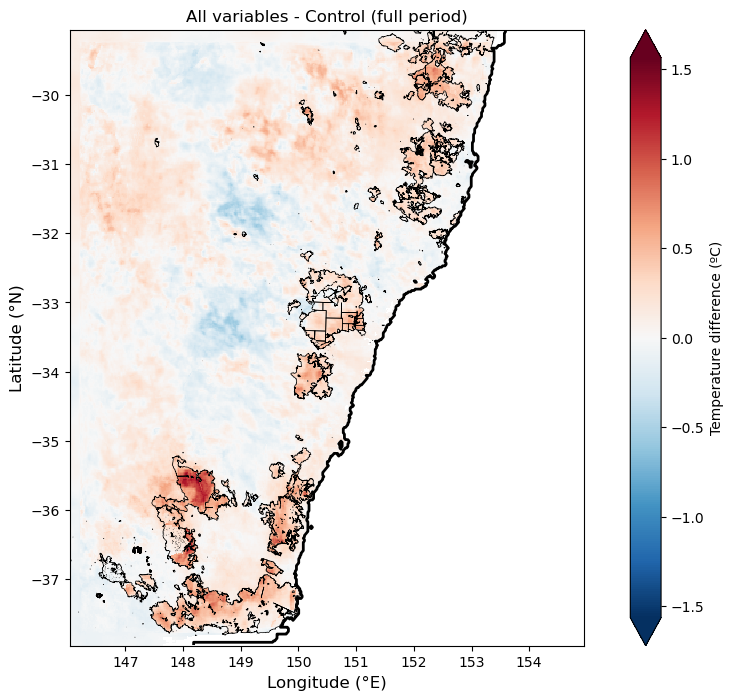

In [12]:
# Select all hours in that day, convert mm/s → mm/hour, then sum
allvar_day = allvar.mean(dim='time', skipna=True)
control_day = control.mean(dim='time', skipna=True)

# Calculate cumulative daily difference
diff = allvar_day - control_day

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
im = diff.plot(
    ax=ax,
    cmap='RdBu_r',
    center=0,
    extend='both',
    cbar_kwargs={'label': f'Temperature difference (ºC)'}
)

# Add altitude contours
contours2 = sa1.plot.contour(ax=ax, levels=[0], colors='black', linewidths=2, add_colorbar=False)

gpd.GeoSeries(fires.boundary).plot(
    ax=ax, edgecolor="black", linewidth=0.5
)

ax.set_title('All variables - Control (full period)')
ax.set_xlabel("Longitude (°E)", fontsize=12)
ax.set_ylabel("Latitude (°N)", fontsize=12)

plt.show()

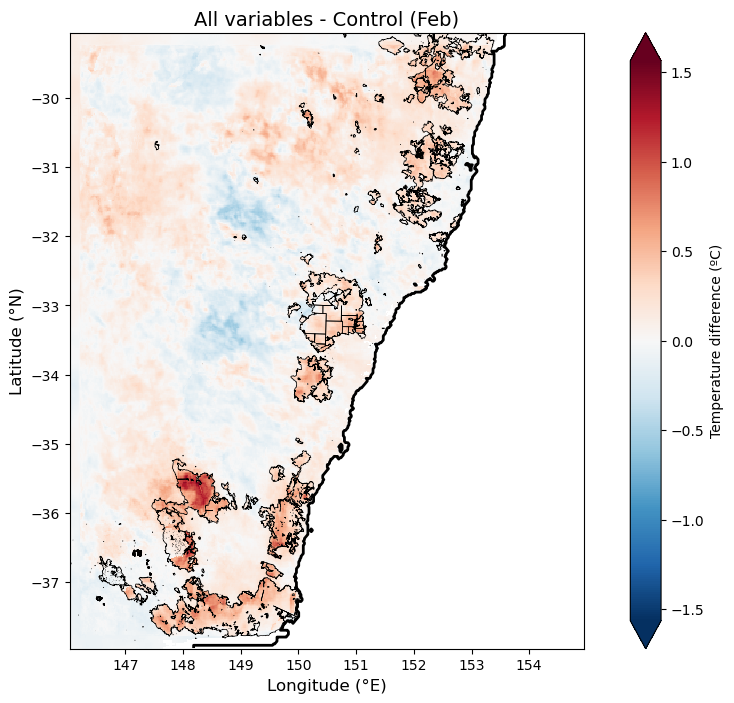

In [28]:
start_date = '2020-02-01'
end_date = '2020-02-13'

allvar_feb = allvar.sel(time=slice(start_date, end_date))
control_feb = control.sel(time=slice(start_date, end_date))

allvar_feb = allvar.mean(dim='time', skipna=True)
control_feb = control.mean(dim='time', skipna=True)

diff_feb = allvar_feb - control_feb

fig, ax = plt.subplots(figsize=(12, 8))
diff_feb.plot(
    ax=ax,
    cmap='RdBu_r',
    center=0,
    # levels=[-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 2, 3],
    extend='both',
    cbar_kwargs={'label': f'Temperature difference (ºC)'}
)

contours2 = sa1.plot.contour(ax=ax, levels=[0], colors='black', linewidths=2, add_colorbar=False)

gpd.GeoSeries(fires.boundary).plot(
    ax=ax, facecolor="none", edgecolor="black", linewidth=0.5
)

plt.title("All variables - Control (Feb)", fontsize=14)
plt.xlabel("Longitude (°E)", fontsize=12)
plt.ylabel("Latitude (°N)", fontsize=12)
plt.show()

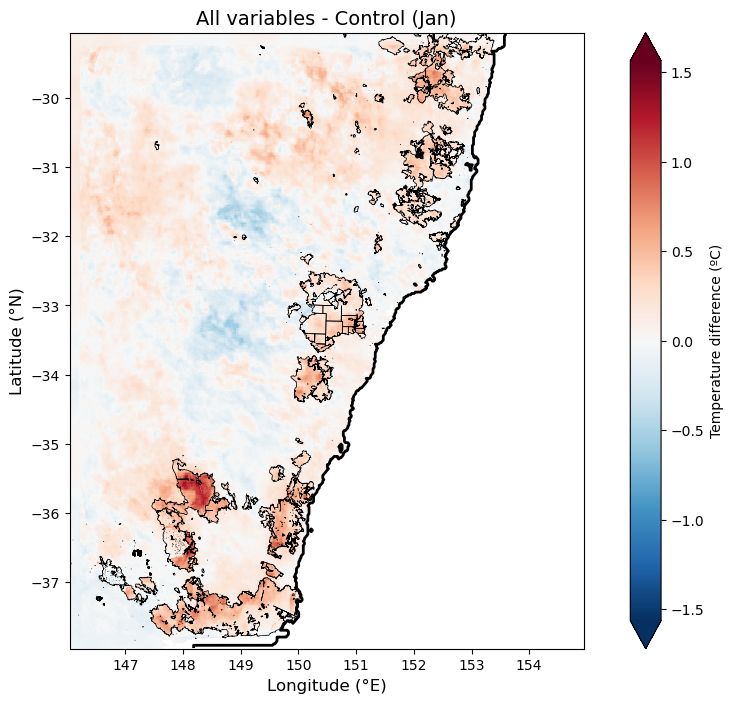

In [27]:
#these variable names say feb but the dates and title are jan - its for jan
start_date = '2020-01-14'
end_date = '2020-01-31'

allvar_feb = allvar.sel(time=slice(start_date, end_date))
control_feb = control.sel(time=slice(start_date, end_date))

allvar_feb = allvar.mean(dim='time', skipna=True)
control_feb = control.mean(dim='time', skipna=True)

diff_feb = allvar_feb - control_feb

fig, ax = plt.subplots(figsize=(12, 8))
diff_feb.plot(
    ax=ax,
    cmap='RdBu_r',
    center=0,
    extend='both',
    cbar_kwargs={'label': f'Temperature difference (ºC)'}
)

contours2 = sa1.plot.contour(ax=ax, levels=[0], colors='black', linewidths=2, add_colorbar=False)

gpd.GeoSeries(fires.boundary).plot(
    ax=ax, facecolor="none", edgecolor="black", linewidth=0.5
)

plt.title("All variables - Control (Jan)", fontsize=14)
plt.xlabel("Longitude (°E)", fontsize=12)
plt.ylabel("Latitude (°N)", fontsize=12)
plt.show()